In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
# plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('creditcard_NEW.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.drop('Time', axis=1, inplace=True)
df.dtypes.tail()

V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [17]:
df.isnull().sum().sum()

0

In [18]:
size = df['Class'].value_counts()
pct = df['Class'].value_counts(normalize=True).round(3)
pd.DataFrame(zip(size, pct), columns=['次數', '百分比'], index=['No','Yes'])

,次數,百分比
No,32456,0.997
Yes,109,0.003


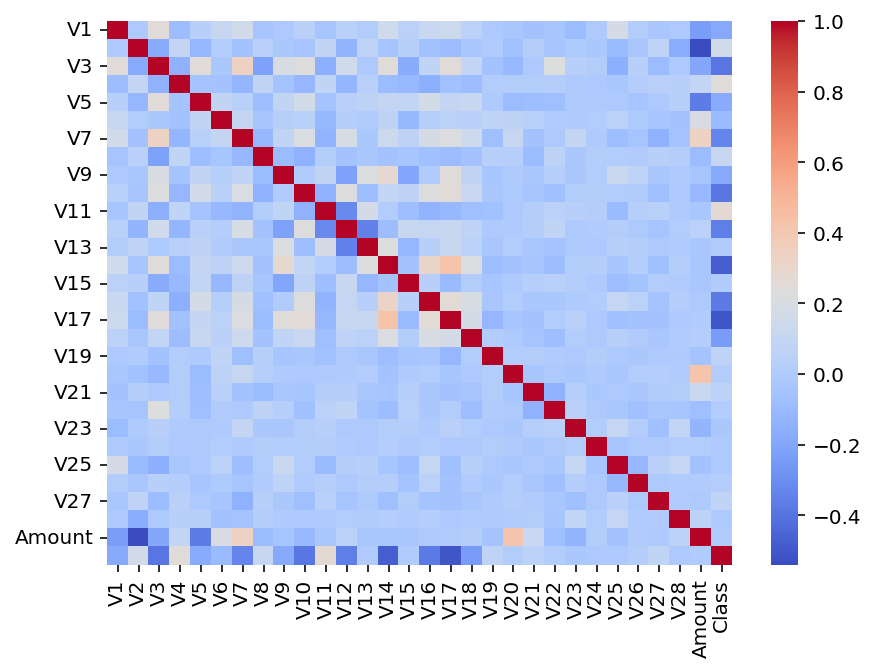

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), cmap='coolwarm');

In [20]:
df_corr = df.drop('Class',axis=1).corrwith(df['Class']).\
sort_values(ascending=False)
print(df_corr[:3])
print(df_corr[-3:])

V11    0.275727
V4     0.245181
V2     0.160025
dtype: float64
V3    -0.392215
V14   -0.478571
V17   -0.504884
dtype: float64


In [21]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,32456.0,92.379535,252.030233,0.0,7.6,24.67,83.2225,12910.93
1,109.0,100.124587,256.579798,0.0,1.0,1.00,88.0000,1809.68


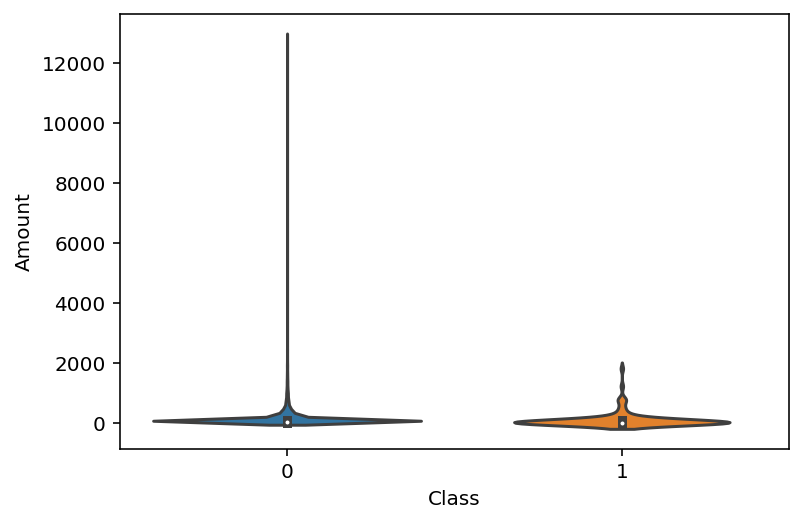

In [22]:
sns.violinplot(x='Class', y='Amount', data=df);

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
dmy = DummyClassifier(strategy='most_frequent')
dmy.fit(X_train, y_train)
dmy.score(X_train, y_train)
y_pred = dmy.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.996417604912999
[[9735    0]
 [  35    0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9735
           1       0.00      0.00      0.00        35

    accuracy                           1.00      9770
   macro avg       0.50      0.50      0.50      9770
weighted avg       0.99      1.00      0.99      9770



In [25]:
# 載入所有模型
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import recall_score

models = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier()]
model_results = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    model_pl.fit(X_train, y_train)
    y_pred = model_pl.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    model_results[model.__class__.__name__] = [score, recall]
    print(f'模型名稱{model.__class__.__name__:-^50}')
    print('混亂矩陣\n',confusion_matrix(y_test, y_pred))
    print(f'正確率: {score:.3f}， 召回率: {recall:.3f}\n')

模型名稱----------------LogisticRegression----------------
混亂矩陣
 [[9731    4]
 [   9   26]]
正確率: 0.999， 召回率: 0.743

模型名稱-----------------------SVC------------------------
混亂矩陣
 [[9735    0]
 [  12   23]]
正確率: 0.999， 召回率: 0.657

模型名稱---------------KNeighborsClassifier---------------
混亂矩陣
 [[9735    0]
 [   7   28]]
正確率: 0.999， 召回率: 0.800

模型名稱--------------RandomForestClassifier--------------
混亂矩陣
 [[9735    0]
 [   4   31]]
正確率: 1.000， 召回率: 0.886



In [26]:
df_orig = pd.DataFrame(model_results.values(), index=model_results.keys(),
             columns=['prec','recall']).sort_values(by='recall', ascending=False)
df_orig

,prec,recall
RandomForestClassifier,0.999591,0.885714
KNeighborsClassifier,0.999284,0.800000
LogisticRegression,0.998669,0.742857
SVC,0.998772,0.657143


In [27]:
models = [LogisticRegression(class_weight='balanced'), SVC(class_weight='balanced'), 
          RandomForestClassifier(class_weight='balanced')]
model_results = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    model_pl.fit(X_train, y_train)
    y_pred = model_pl.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    model_results[model.__class__.__name__] = [score, recall]
    print(f'{model.__class__.__name__:-^50}')
    print(confusion_matrix(y_test, y_pred))
    print(f'正確率: {score:.3f}， 召回率: {recall:.3f}')
    print()

----------------LogisticRegression----------------
[[9593  142]
 [   1   34]]
正確率: 0.985， 召回率: 0.971

-----------------------SVC------------------------
[[9730    5]
 [   7   28]]
正確率: 0.999， 召回率: 0.800

--------------RandomForestClassifier--------------
[[9735    0]
 [   7   28]]
正確率: 0.999， 召回率: 0.800



In [28]:
df_weight = pd.DataFrame(model_results.values(), index=model_results.keys(),
             columns=['prec','recall']).sort_values(by='recall', ascending=False)
df_weight

,prec,recall
LogisticRegression,0.985363,0.971429
SVC,0.998772,0.800000
RandomForestClassifier,0.999284,0.800000


In [29]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
np.random.seed(42)
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier()]
model_results = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), RandomUnderSampler(), model)
    model_pl.fit(X_train, y_train)
    y_pred = model_pl.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    model_results[model.__class__.__name__] = [score, recall]
    print(f'{model.__class__.__name__:-^50}')
    print(confusion_matrix(y_test, y_pred))
    print(f'正確率: {score:.3f}， 召回率: {recall:.3f}')
    print()

----------------LogisticRegression----------------
[[9498  237]
 [   1   34]]
正確率: 0.976， 召回率: 0.971

-----------------------SVC------------------------
[[9660   75]
 [   1   34]]
正確率: 0.992， 召回率: 0.971

---------------KNeighborsClassifier---------------
[[9613  122]
 [   1   34]]
正確率: 0.987， 召回率: 0.971

--------------RandomForestClassifier--------------
[[9583  152]
 [   1   34]]
正確率: 0.984， 召回率: 0.971



In [30]:
df_down = pd.DataFrame(model_results.values(), index=model_results.keys(),
             columns=['prec','recall']).sort_values(by='recall', ascending=False)
df_down

,prec,recall
LogisticRegression,0.975640,0.971429
SVC,0.992221,0.971429
KNeighborsClassifier,0.987410,0.971429
RandomForestClassifier,0.984340,0.971429


In [31]:
df_recall = pd.concat([df_orig, df_weight, df_down], axis=1, 
                      keys=['沒處理','權重法','向下取樣'])
df_recall.xs('recall', level=1, axis=1).style.highlight_max(axis=1)

,沒處理,權重法,向下取樣
RandomForestClassifier,0.885714,0.800000,0.971429
KNeighborsClassifier,0.800000,nan,0.971429
LogisticRegression,0.742857,0.971429,0.971429
SVC,0.657143,0.800000,0.971429


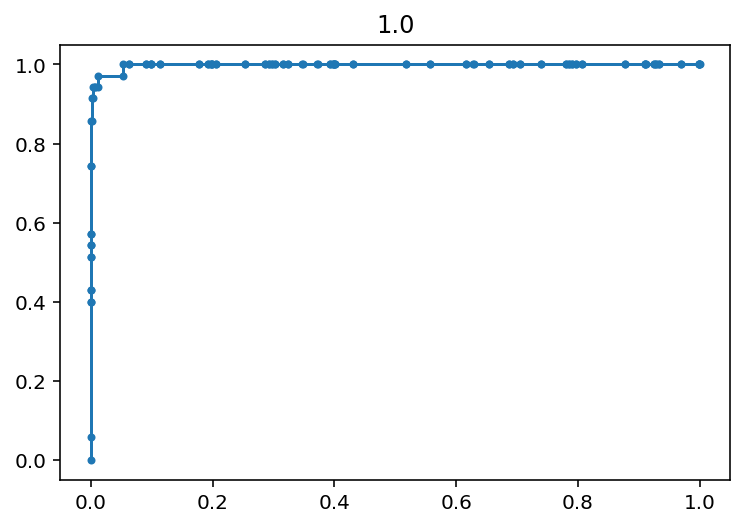

In [32]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
model_pl = make_pipeline(StandardScaler(), 
                         RandomUnderSampler(),
                         LogisticRegression()) 
model_pl.fit(X_train, y_train)
y_pred_proba = model_pl.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr) 
roc_auc
plt.plot(fpr, tpr, marker='.')
plt.title(roc_auc.round(2));

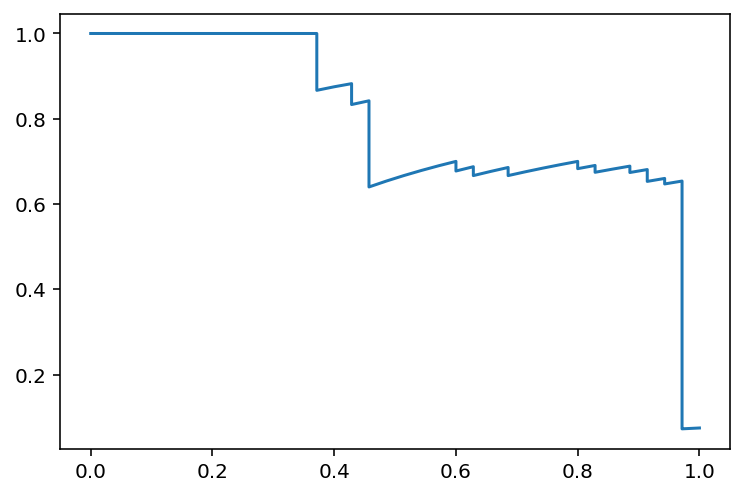

In [33]:
from sklearn.metrics import precision_recall_curve
model_pl = make_pipeline(StandardScaler(), 
                         RandomUnderSampler(),
                         LogisticRegression()) 
model_pl.fit(X_train, y_train)
y_pred_proba = model_pl.predict_proba(X_test)[:,1]
prec, recall, thres = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, prec)